In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Begin by defining the output parsing function for usage

In [3]:
def float_or_str(s):
    try:
        return float(s)
    except ValueError:
        return s


def output_parse(fname):
    optim_data = {'Cortex': [],
                  'Subject': [],
                  'Max_Demand': [],
                  'Final_Distance': []}
    with open(fname) as f:
        for line in filter(None, (line.rstrip() for line in f)):
            li = line.lstrip()
            li = li.split()
            if li[0][:2] == '~~':
                input_file = os.path.splitext(os.path.split(
                    li[-1])[1])[0].split('_')
                optim_data['Cortex'].append(input_file[-1])
                optim_data['Subject'].append(input_file[1])
                optim_data['Max_Demand'].append(
                    float_or_str(input_file[-2]) / 10)
            if li[0][:2] == '^^':
                optim_data.setdefault(li[1][:-1],
                                      []).append(float_or_str(li[-1]))

            if li[0][:2] == '&&':
                optim_data['Final_Distance'].append(float_or_str(li[-1]))

    return optim_data

Define overnight output file location and parse into dictionary

In [14]:
OVERNIGHT_FILE = '/home/buck06191/Desktop/bsx_data/overnight_optim_edit.txt'
overnight_dict = output_parse(OVERNIGHT_FILE)
import copy
x = copy.copy(overnight_dict)
{k:len(x[k]) for k in x.keys()}

{'Cortex': 286,
 'Final_Distance': 286,
 'Max_Demand': 286,
 'R_autc': 286,
 'R_autp': 286,
 'Subject': 286}

In [9]:
overnight_df = pd.DataFrame(overnight_dict)

Define a function that lets us pull out the optimal fit for a specific cortex

In [10]:

    
def optimal_fit(xx, cortex):
    df = xx.loc[xx['Cortex']==cortex]
    return df.loc[df['Final_Distance']==df['Final_Distance'].min()]

In [11]:
df_PFC = overnight_df.loc[overnight_df['Cortex']=='PFC']

df_VC = overnight_df.loc[overnight_df['Cortex']=='VC']
optimal_PFC = df_PFC.loc[df_PFC.groupby(['Subject', 'Max_Demand']).Final_Distance.agg('idxmin')]
optimal_PFC

,Cortex,Final_Distance,Max_Demand,R_autc,R_autp,Subject
255,PFC,6.733238,1.0,1.621917,5.162118,P11
179,PFC,12.781287,1.1,1.543286,5.016388,P11
207,PFC,18.687734,1.2,1.525460,5.148717,P11
231,PFC,25.352937,1.3,1.536582,5.115123,P11
208,PFC,32.622162,1.4,1.510248,5.011761,P11
83,PFC,38.501436,1.5,1.529471,5.106231,P11
192,PFC,44.350778,1.6,1.588004,5.186452,P11
247,PFC,51.070146,1.7,1.554699,5.138373,P11
139,PFC,56.595233,1.8,1.511723,5.168603,P11
264,PFC,63.953082,1.9,1.527446,5.088902,P11


In [12]:
optimal_VC = df_VC.loc[df_VC.groupby(['Subject', 'Max_Demand']).Final_Distance.agg('idxmin')]

In [13]:

df = result = pd.concat([optimal_VC, optimal_PFC])
R_corr = df.groupby(['Cortex', 'Max_Demand'])['R_autc'].apply(lambda x: x.corr(df['R_autp']))
t_corr = df.groupby(['Cortex', 'Max_Demand'])['t_c'].apply(lambda x: x.corr(df['t_p']))
print(R_corr)
plt.figure()
plt.plot(R_corr.index.levels[1], R_corr.ix['PFC'], '.r', label='PFC')
plt.plot(R_corr.index.levels[1], R_corr.ix['VC'], '.b', label='VC')
plt.title('R Correlation')
plt.legend()

plt.figure()
plt.plot(t_corr.index.levels[1], t_corr.ix['PFC'], '.r', label='PFC')
plt.title('Time Correlation')
plt.plot(t_corr.index.levels[1], t_corr.ix['VC'], '.b', label='VC')
plt.legend()

KeyError: 'Column not found: t_c'

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


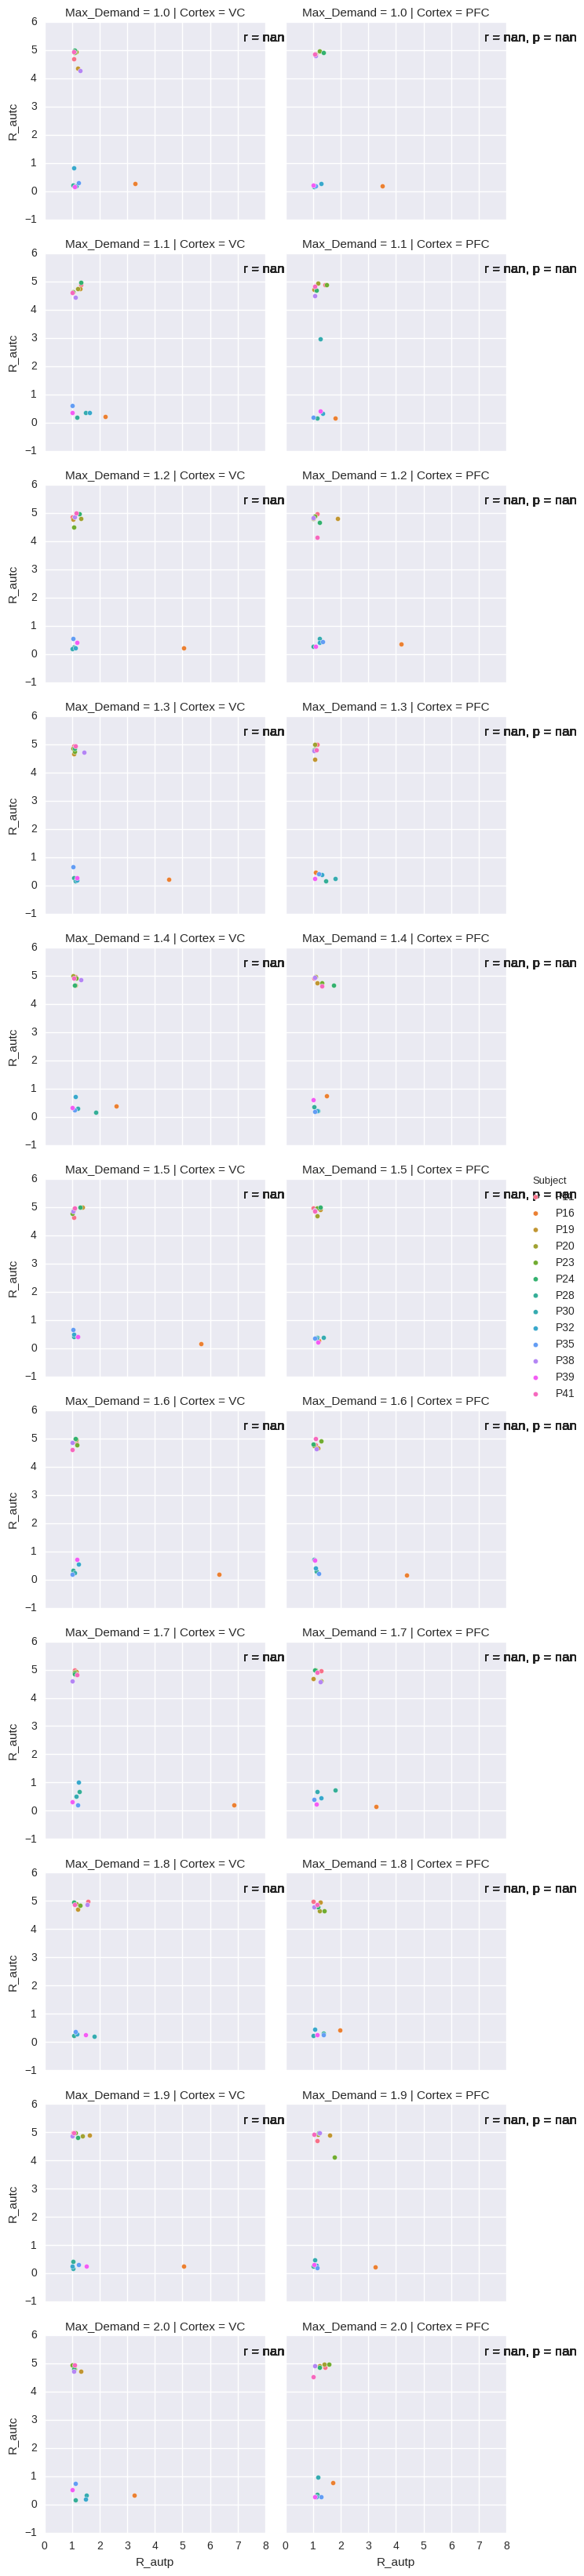

In [56]:
g = sns.FacetGrid(df, col="Cortex", row='Max_Demand', hue='Subject')
g = (g.map(plt.scatter, "R_autp", "R_autc", edgecolor="w")).add_legend()

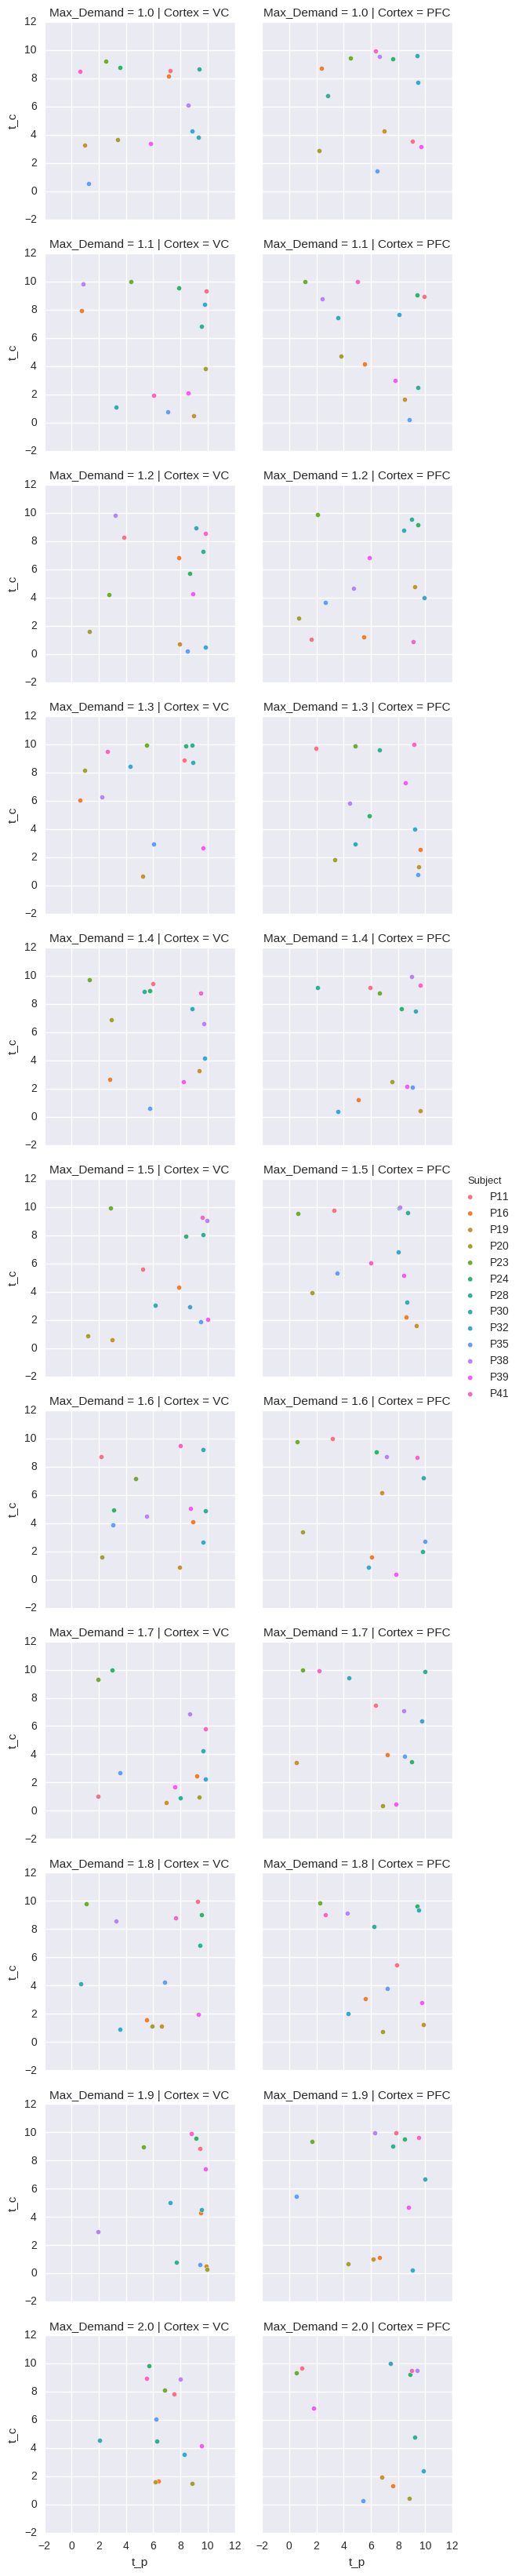

In [53]:
g = sns.FacetGrid(df, col="Cortex", row='Max_Demand', hue='Subject')
g = (g.map(plt.scatter, "t_p", "t_c", edgecolor="w")).add_legend()

## Visualising the results

It makes sense to try and visualise the results as a whole. Knowing the single best fit for each cortex doesn't show us the trend across all subjects or the data as a whole. 

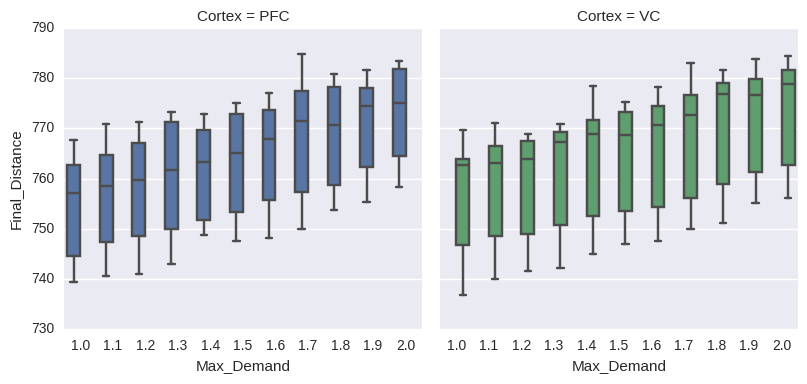

In [10]:
g=sns.factorplot(data=overnight_df, x='Max_Demand', y='Final_Distance',
                 hue='Cortex', col='Cortex', kind='box', col_wrap=3)

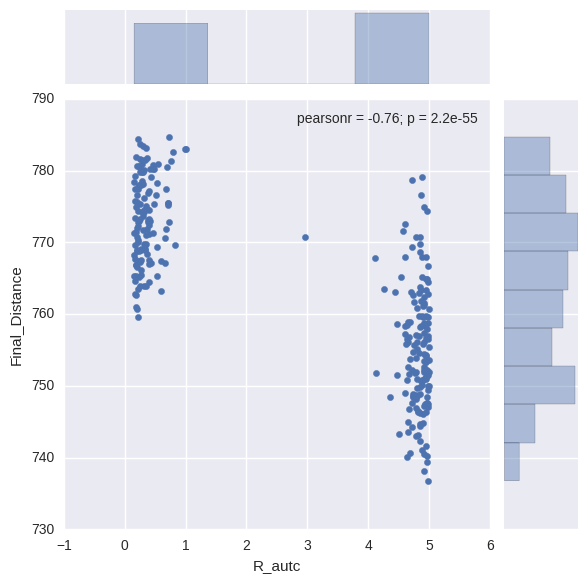

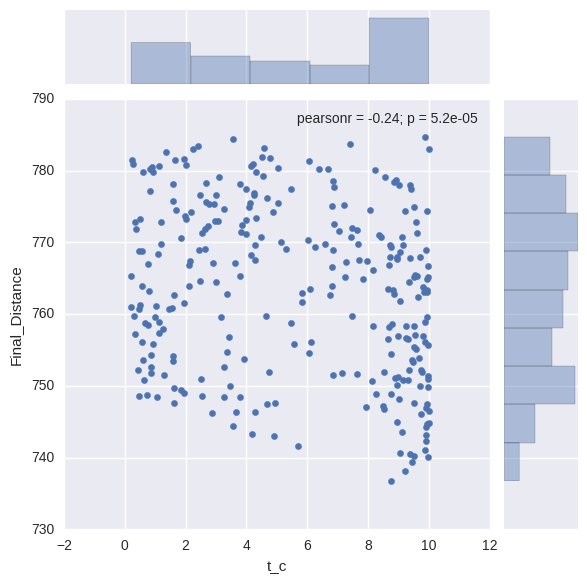

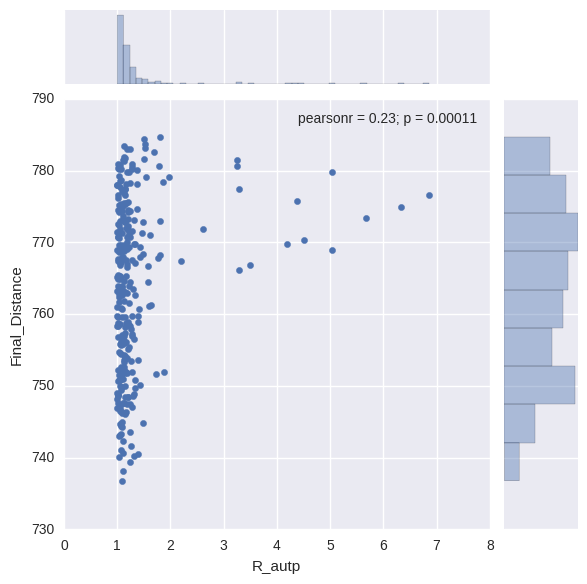

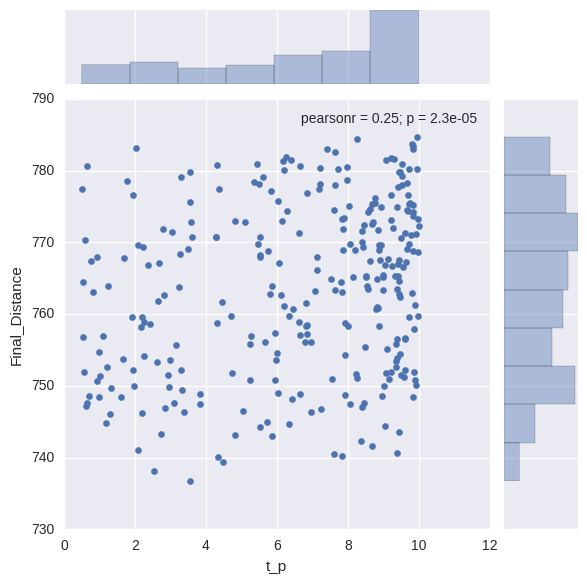

In [11]:
param_list = ['R_autc', 't_c', 'R_autp', 't_p']
for parameter in param_list:
    plt.figure()
    sns.jointplot(parameter, 'Final_Distance', overnight_df)

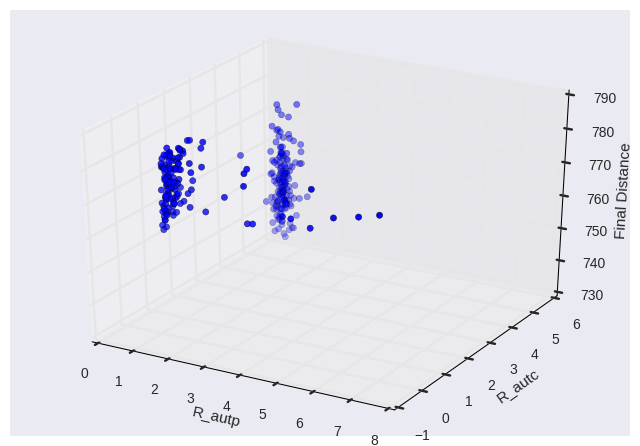

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
threedee = plt.figure().gca(projection='3d')
threedee.scatter(overnight_df['R_autp'], overnight_df['R_autc'], overnight_df['Final_Distance'])
threedee.set_xlabel('R_autp')
threedee.set_ylabel('R_autc')
threedee.set_zlabel('Final Distance')
plt.show()